In [51]:
# Timeline Analysis : Covid-19
#Author - Abhishek Tope

import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd 
import random
import math
import time
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error
import datetime



In [4]:
confirmed_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')
deaths_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv')
recoveries_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv')
csse_daily_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/08-16-2020.csv')

In [5]:
confirmed_df
# confirmed_df has time series data of cases over time

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,12/10/20,12/11/20,12/12/20,12/13/20,12/14/20,12/15/20,12/16/20,12/17/20,12/18/20,12/19/20
0,NaN,Afghanistan,33.939110,67.709953,0,0,0,0,0,0,...,48053,48116,48229,48527,48718,48952,49161,49378,49621,49681
1,NaN,Albania,41.153300,20.168300,0,0,0,0,0,0,...,46061,46863,47742,48530,49191,50000,50637,51424,52004,52542
2,NaN,Algeria,28.033900,1.659600,0,0,0,0,0,0,...,90579,91121,91638,92102,92597,93065,93507,93933,94371,94781
3,NaN,Andorra,42.506300,1.521800,0,0,0,0,0,0,...,7190,7236,7288,7338,7382,7382,7446,7466,7519,7560
4,NaN,Angola,-11.202700,17.873900,0,0,0,0,0,0,...,15925,16061,16161,16188,16277,16362,16407,16484,16562,16626
5,NaN,Antigua and Barbuda,17.060800,-61.796400,0,0,0,0,0,0,...,146,147,148,148,148,148,151,151,152,152
6,NaN,Argentina,-38.416100,-63.616700,0,0,0,0,0,0,...,1482216,1489328,1494602,1498160,1503222,1510203,1517046,1524372,1531374,1537169
7,NaN,Armenia,40.069100,45.038200,0,0,0,0,0,0,...,145240,146317,147312,148325,148682,149120,150218,151392,152253,153173
8,Australian Capital Territory,Australia,-35.473500,149.012400,0,0,0,0,0,0,...,117,117,117,117,117,117,117,117,117,117
9,New South Wales,Australia,-33.868800,151.209300,0,0,0,0,3,4,...,4633,4639,4642,4645,4650,4657,4666,4682,4712,4748


In [6]:
csse_daily_df

,FIPS,Admin2,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,Combined_Key,Incidence_Rate,Case-Fatality_Ratio
0,NaN,NaN,NaN,Afghanistan,2020-08-17 04:27:20,33.939110,67.709953,37590,1376,27166,9055.0,Afghanistan,96.577452,3.657304
1,NaN,NaN,NaN,Albania,2020-08-17 04:27:20,41.153300,20.168300,7380,228,3794,3358.0,Albania,256.445896,3.089431
2,NaN,NaN,NaN,Algeria,2020-08-17 04:27:20,28.033900,1.659600,38583,1370,27017,10196.0,Algeria,87.986505,3.550787
3,NaN,NaN,NaN,Andorra,2020-08-17 04:27:20,42.506300,1.521800,989,53,863,73.0,Andorra,1280.010354,5.358948
4,NaN,NaN,NaN,Angola,2020-08-17 04:27:20,-11.202700,17.873900,1906,88,628,1190.0,Angola,5.799259,4.616999
5,NaN,NaN,NaN,Antigua and Barbuda,2020-08-17 04:27:20,17.060800,-61.796400,93,3,88,2.0,Antigua and Barbuda,94.967731,3.225806
6,NaN,NaN,NaN,Argentina,2020-08-17 04:27:20,-38.416100,-63.616700,294569,5703,211702,77164.0,Argentina,651.762221,1.936049
7,NaN,NaN,NaN,Armenia,2020-08-17 04:27:20,40.069100,45.038200,41663,818,34584,6261.0,Armenia,1405.997636,1.963373
8,NaN,NaN,Australian Capital Territory,Australia,2020-08-17 04:27:20,-35.473500,149.012400,113,3,110,0.0,"Australian Capital Territory, Australia",26.395702,2.654867
9,NaN,NaN,New South Wales,Australia,2020-08-17 04:27:20,-33.868800,151.209300,3957,52,2994,911.0,"New South Wales, Australia",48.743533,1.314127


In [7]:
csse_daily_df['Country_Region'].value_counts()

US                                  3261
Russia                                83
Japan                                 49
India                                 37
Colombia                              33
China                                 33
Mexico                                32
Brazil                                27
Ukraine                               27
Peru                                  26
Italy                                 21
Sweden                                21
Spain                                 20
Germany                               17
Netherlands                           17
Chile                                 17
Canada                                15
United Kingdom                        15
France                                11
Australia                              8
Pakistan                               7
Denmark                                3
San Marino                             1
Oman                                   1
Saint Vincent an

In [8]:
%pip install geopandas

Note: you may need to restart the kernel to use updated packages.


    ERROR: Complete output from command python setup.py egg_info:
    ERROR: A GDAL API version must be specified. Provide a path to gdal-config using a GDAL_CONFIG environment variable or use a GDAL_VERSION environment variable.
    ----------------------------------------
ERROR: Command "python setup.py egg_info" failed with error code 1 in C:\Users\Admin\AppData\Local\Temp\pip-install-gzt_n8cz\fiona\


In [14]:
# Top 7 countries
csse_daily_df['Country_Region'].value_counts()[:7]
# US has over 3000 entries in data

US          3261
Russia        83
Japan         49
India         37
Colombia      33
China         33
Mexico        32
Name: Country_Region, dtype: int64

In [15]:
top_c = csse_daily_df.groupby(['Country_Region']).Confirmed.sum().sort_values(ascending=False)
top_c

Country_Region
US                                  5405257
Brazil                              3340197
India                               2647663
Russia                               920719
South Africa                         587345
Peru                                 525803
Mexico                               522162
Colombia                             468332
Chile                                385946
Iran                                 343203
Spain                                342813
United Kingdom                       320343
Saudi Arabia                         298542
Argentina                            294569
Pakistan                             289215
Bangladesh                           276549
France                               257994
Italy                                253915
Turkey                               249309
Germany                              225007
Iraq                                 176931
Philippines                          161253
Indonesia        

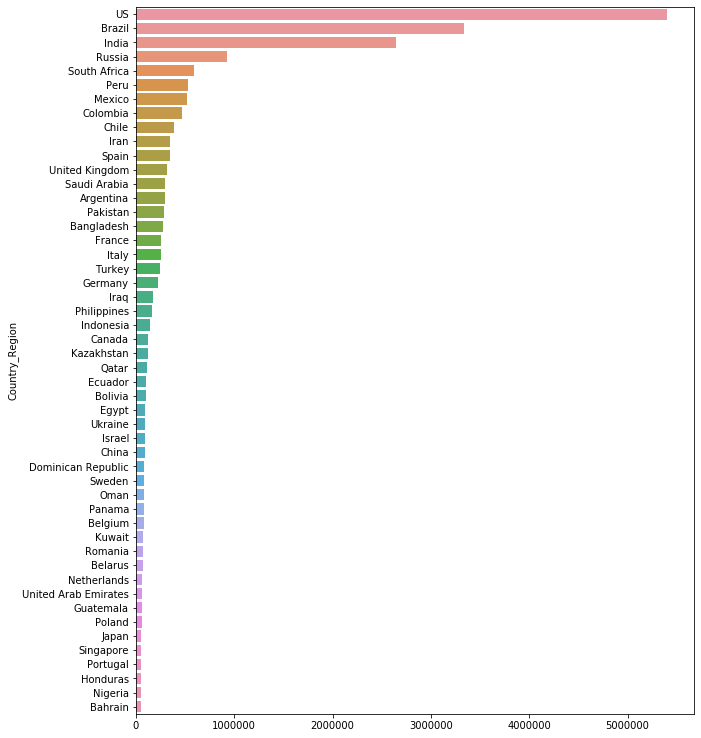

In [16]:
# Top 50 Country wise Confirmed cases acc to given data

fig, ax = plt.subplots(figsize=(10, 13))
sns.barplot(y=top_c.index[:50], x=top_c.values[:50])

##### **It looks like most of the data is very much skewed towards US, with 3000+ entries In general you fix this skewness by removing outliers, UnderSampling, taking Log of Values etc. But that depends on the data, we basically will only use US to do our Analysis!!

So, let's focus on US only and see what columns have significance in the result or what are the correlations, to see whether we should do time series prediction only or should also look at other variables to consider.**

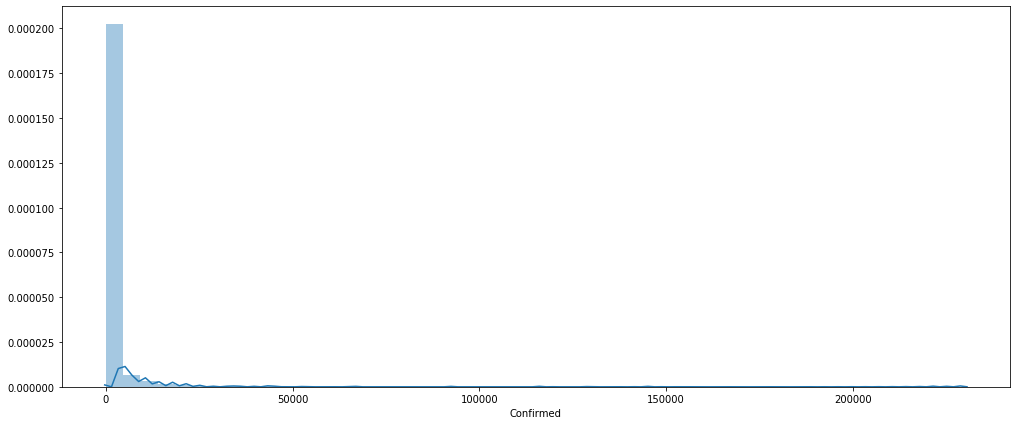

In [17]:
csse_daily_df_us = csse_daily_df[csse_daily_df['Country_Region']=='US'] # get US only data

fig, ax = plt.subplots(figsize=(17, 7))
sns.distplot(csse_daily_df_us['Confirmed'].dropna())

In [18]:
# Drop Unnecessary Columns
csse_daily_df_us.drop(['Country_Region','Province_State','Long_','Last_Update','Combined_Key'], axis=1, inplace=True)

csse_daily_df_us.Recovered.value_counts()

C:\Users\Admin\Anaconda3\lib\site-packages\pandas\core\frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


0          3260
1833067       1
Name: Recovered, dtype: int64

C:\Users\Admin\Anaconda3\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\Admin\Anaconda3\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


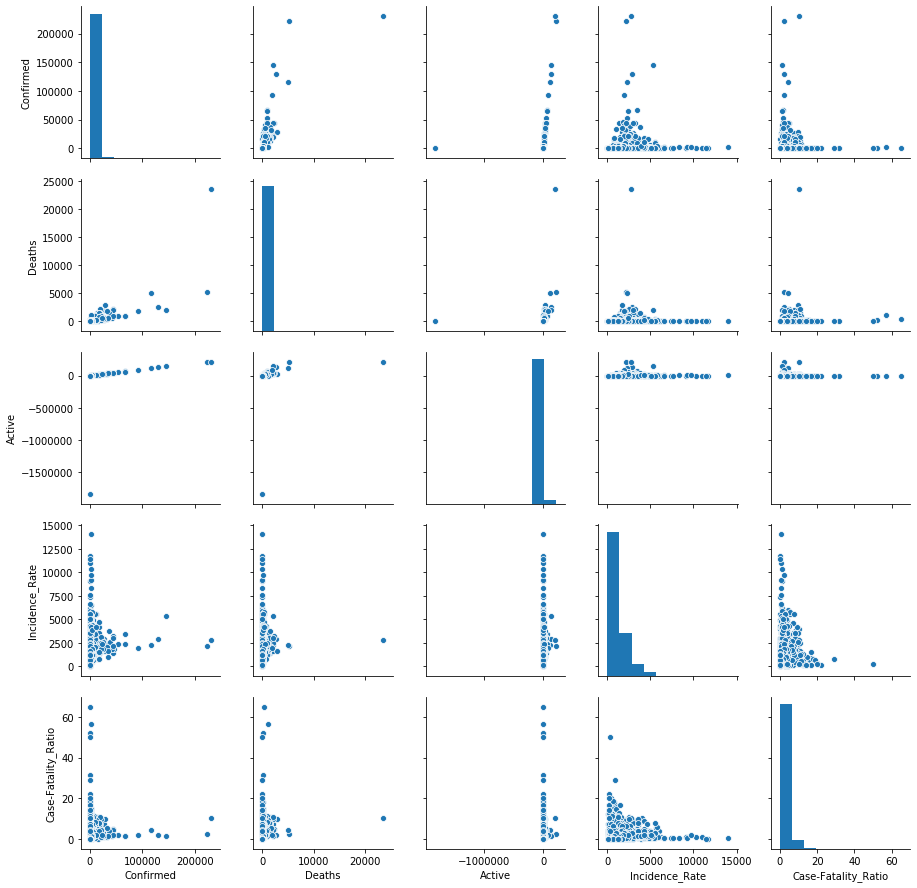

In [19]:
sns.pairplot(csse_daily_df_us[['Confirmed','Deaths','Active','Incidence_Rate','Case-Fatality_Ratio']])

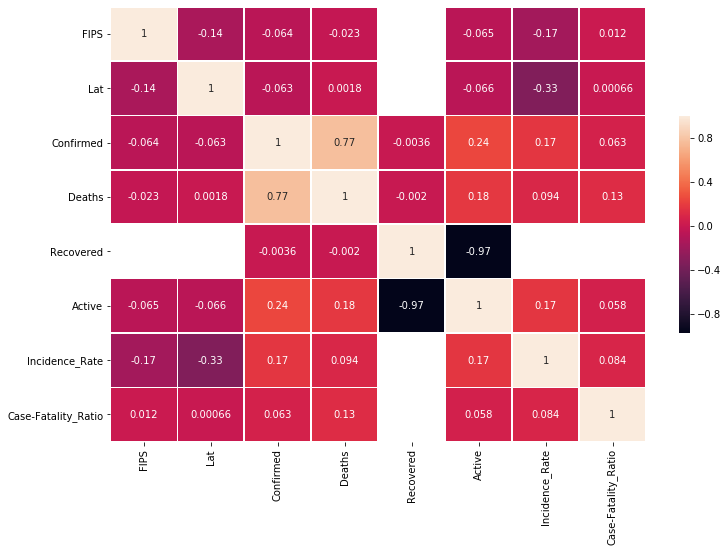

In [20]:
fig, ax = plt.subplots(figsize=(12, 8))
corr = csse_daily_df_us.corr()
sns.heatmap(corr, linewidths=.5, cbar_kws={"shrink": .5},annot=True)

#### Confirm, death, and Active have high positive corelation, where as rest has negative corelation

In [21]:
# get a list of dates 
dates = confirmed_df.keys()[4:]

confirmed = confirmed_df.loc[:, dates]
deaths = deaths_df.loc[:, dates]
recoveries = recoveries_df.loc[:, dates]

confirmed

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,12/10/20,12/11/20,12/12/20,12/13/20,12/14/20,12/15/20,12/16/20,12/17/20,12/18/20,12/19/20
0,0,0,0,0,0,0,0,0,0,0,...,48053,48116,48229,48527,48718,48952,49161,49378,49621,49681
1,0,0,0,0,0,0,0,0,0,0,...,46061,46863,47742,48530,49191,50000,50637,51424,52004,52542
2,0,0,0,0,0,0,0,0,0,0,...,90579,91121,91638,92102,92597,93065,93507,93933,94371,94781
3,0,0,0,0,0,0,0,0,0,0,...,7190,7236,7288,7338,7382,7382,7446,7466,7519,7560
4,0,0,0,0,0,0,0,0,0,0,...,15925,16061,16161,16188,16277,16362,16407,16484,16562,16626
5,0,0,0,0,0,0,0,0,0,0,...,146,147,148,148,148,148,151,151,152,152
6,0,0,0,0,0,0,0,0,0,0,...,1482216,1489328,1494602,1498160,1503222,1510203,1517046,1524372,1531374,1537169
7,0,0,0,0,0,0,0,0,0,0,...,145240,146317,147312,148325,148682,149120,150218,151392,152253,153173
8,0,0,0,0,0,0,0,0,0,0,...,117,117,117,117,117,117,117,117,117,117
9,0,0,0,0,3,4,4,4,4,4,...,4633,4639,4642,4645,4650,4657,4666,4682,4712,4748


In [22]:
total_cases = confirmed.sum(axis=0).values
total_deaths = deaths.sum(axis=0).values
total_recoveries = recoveries.sum(axis=0).values

# let's find how many are active still, those who didn't die or recovered but were daignozed
total_active = total_cases - total_deaths - total_recoveries

In [23]:
print("total cases accumulated = {} \noverall total_cases = {}".format(max(total_cases),max(confirmed['7/13/20'])))

total cases accumulated = 76289042 
overall total_cases = 3356407


In [24]:
# get the unique countries
countries = confirmed_df['Country/Region'].unique()
len(countries)

191

#### Worst affected counutries till date, take top 50 worst

In [25]:
def p(x):
    return x.loc[:,dates].sum(axis=1).values[0]

worst_countries = confirmed_df.groupby('Country/Region').apply(p).sort_values(ascending = False)[:50]
worst_countries[:10]

Country/Region
US           1494055105
India         962192496
Brazil        801502855
Russia        258390326
Spain         164198267
Colombia      136440190
Peru          132581354
Mexico        132548721
Argentina     129396753
Italy         126976127
dtype: int64

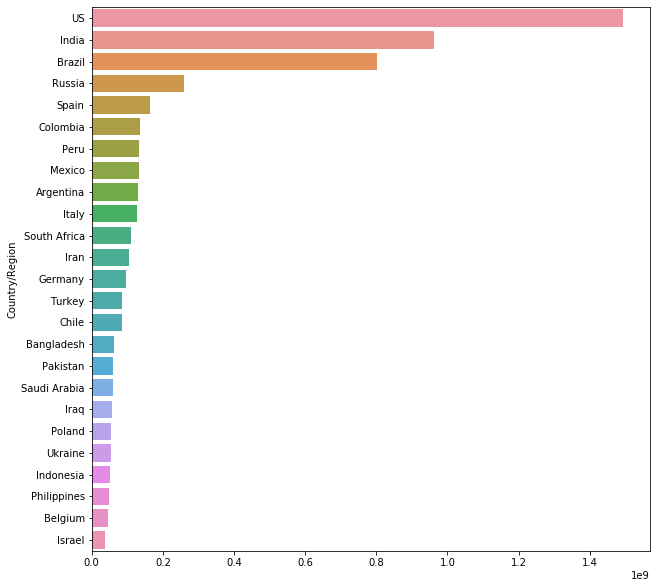

In [26]:
fig, ax = plt.subplots(figsize=(10, 10))
sns.barplot(y=worst_countries.index[:25], x=worst_countries.values[:25])

In [27]:
# This method is imp because we have data in accumulative format
def daily_values(data):
    d = [] 
    d.append(data[0])
    for i in range(1,len(data)):
        d.append(data[i]-data[i-1]) # get unique date for the day, since it is accumulative
    return d 

def weekly_average(data):
    weekly_average = []
    for i in range(len(data)):
        if i + 7 < len(data):
            weekly_average.append(np.mean(data[i:i+7]))
        else:
            weekly_average.append(np.mean(data[i:len(data)]))
    return weekly_average


# mortality rate
mortality_rate = np.array(daily_values(total_deaths))/np.array(daily_values(total_cases))

#recovery rate
recovery_rate = np.array(daily_values(total_recoveries))/np.array(daily_values(total_cases))


In [28]:
#days array
days = np.array(range(len(dates))).reshape(-1, 1)

# confirmed cases
global_daily_values = daily_values(total_cases)
global_daily_increase_avg = weekly_average(global_daily_values)

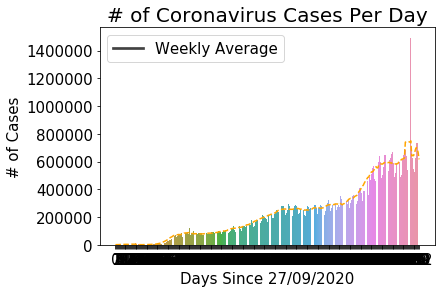

In [29]:
sns.barplot(x = list(range(len(global_daily_values))),y = global_daily_values)
plt.plot(days, global_daily_increase_avg, linestyle='dashed', color='orange')
plt.title('# of Coronavirus Cases Per Day', size=20)
plt.xlabel('Days Since 27/09/2020', size=15)
plt.ylabel('# of Cases', size=15)
plt.legend(['Weekly Average'], prop={'size': 15})
plt.xticks(size=15)
plt.yticks(size=15)
plt.show()

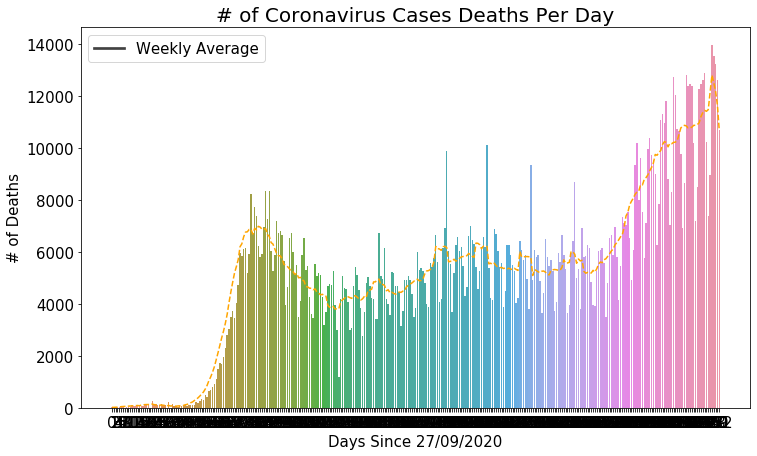

In [30]:
# Daily Deaths
global_daily_deaths = daily_values(total_deaths)
global_daily_death_avg = weekly_average(global_daily_deaths)

fig, ax = plt.subplots(figsize=(12, 7))
sns.barplot(x = list(range(len(global_daily_deaths))),y=global_daily_deaths)
plt.plot(days, global_daily_death_avg, linestyle='dashed', color='orange')
plt.title('# of Coronavirus Cases Deaths Per Day', size=20)
plt.xlabel('Days Since 27/09/2020', size=15)
plt.ylabel('# of Deaths', size=15)
plt.legend(['Weekly Average'], prop={'size': 15})
plt.xticks(size=15)
plt.yticks(size=15)
plt.show()

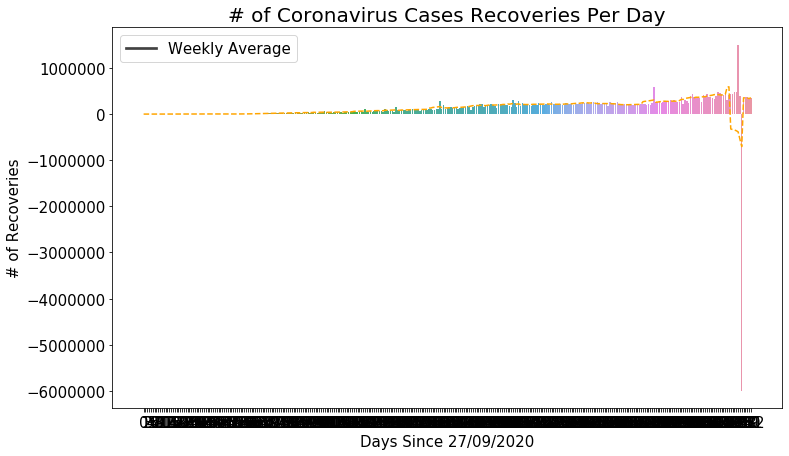

In [31]:
# Daily Recoveries
global_daily_recoveries = daily_values(total_recoveries)
global_daily_recoveries_avg = weekly_average(global_daily_recoveries)


fig, ax = plt.subplots(figsize=(12, 7))
sns.barplot(x = list(range(len(global_daily_recoveries))),y=global_daily_recoveries)
plt.plot(days, global_daily_recoveries_avg, linestyle='dashed', color='orange')
plt.title('# of Coronavirus Cases Recoveries Per Day', size=20)
plt.xlabel('Days Since 27/09/2020', size=15)
plt.ylabel('# of Recoveries', size=15)
plt.legend(['Weekly Average'], prop={'size': 15})
plt.xticks(size=15)
plt.yticks(size=15)
plt.show()

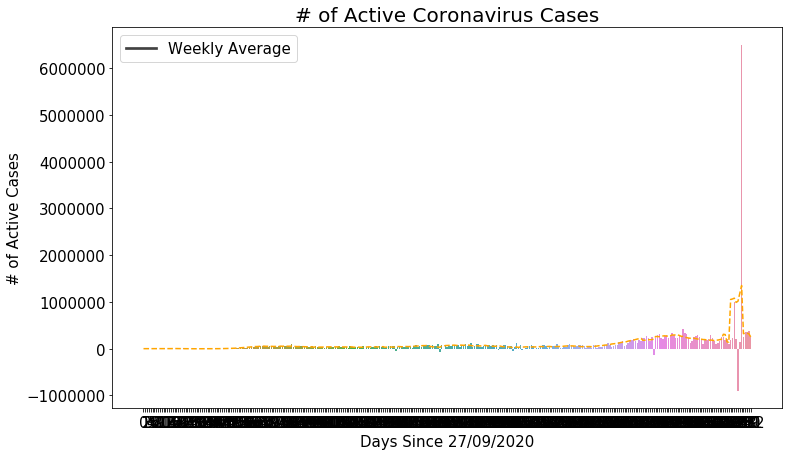

In [32]:
#Active Cases
global_daily_active = daily_values(total_active)
global_active_avg = weekly_average(global_daily_active)


fig, ax = plt.subplots(figsize=(12, 7))
sns.barplot(x = list(range(len(global_daily_active))),y=global_daily_active)
plt.plot(days, global_active_avg, linestyle='dashed', color='orange')
plt.title('# of Active Coronavirus Cases', size=20)
plt.xlabel('Days Since 27/09/2020', size=15)
plt.ylabel('# of Active Cases', size=15)
plt.legend(['Weekly Average'], prop={'size': 15})
plt.xticks(size=15)
plt.yticks(size=15)
plt.show()

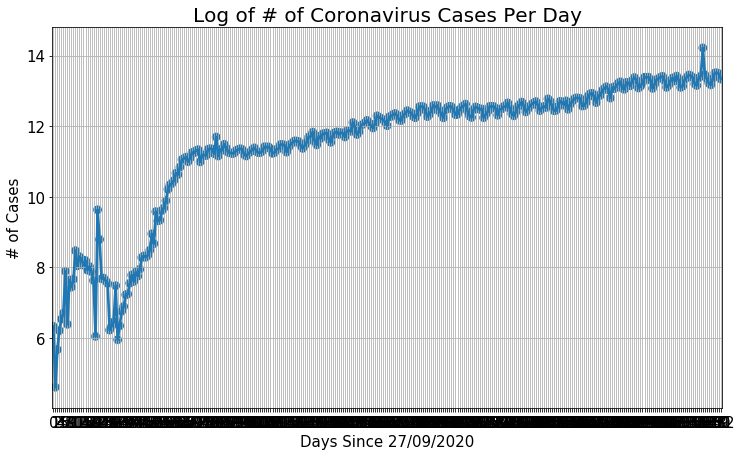

In [33]:
plt.figure(figsize=(12, 7))
sns.pointplot(x = days[:,0] , y = np.log(global_daily_values))
plt.title('Log of # of Coronavirus Cases Per Day', size=20)
plt.xlabel('Days Since 27/09/2020', size=15)
plt.ylabel('# of Cases', size=15)
plt.xticks(size=15)
plt.yticks(size=15)
plt.grid()

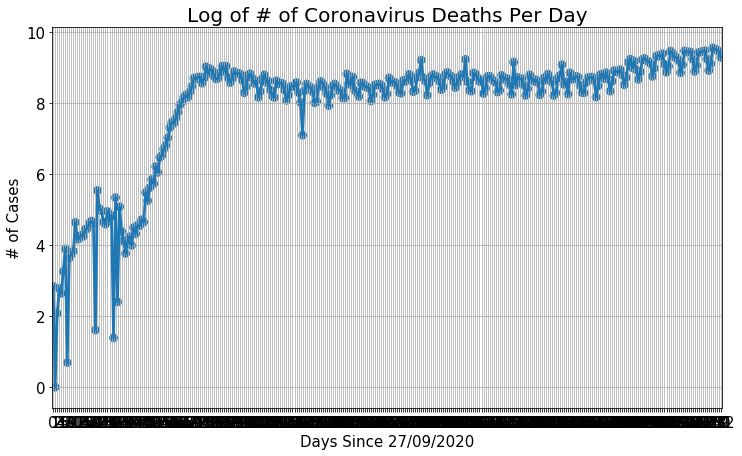

In [34]:
plt.figure(figsize=(12, 7))
sns.pointplot(x = days[:,0] , y = np.log(global_daily_deaths))
plt.title('Log of # of Coronavirus Deaths Per Day', size=20)
plt.xlabel('Days Since 27/09/2020', size=15)
plt.ylabel('# of Cases', size=15)
plt.xticks(size=15)
plt.yticks(size=15)
plt.grid()

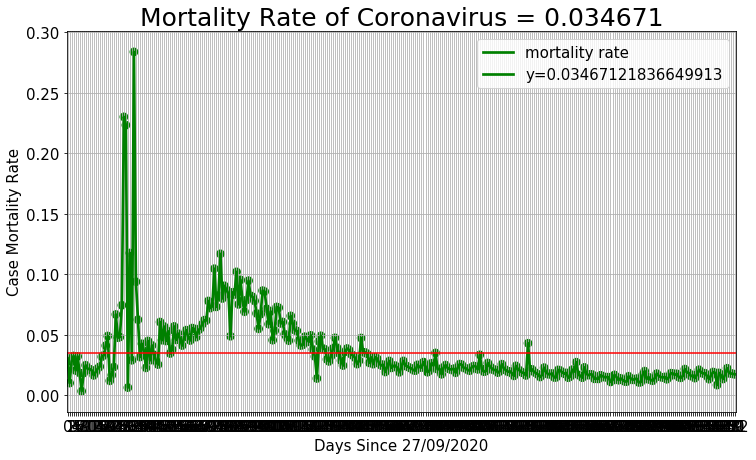

In [36]:
plt.figure(figsize=(12, 7))

sns.pointplot(days[:,0], mortality_rate, color='Green')
plt.axhline(y = np.mean(mortality_rate),linestyle='-', color='red')
plt.title('Mortality Rate of Coronavirus = {0:2f}'.format(np.mean(mortality_rate)), size=25)
plt.legend(['mortality rate', 'y='+str(np.mean(mortality_rate))], prop={'size': 15})
plt.xlabel('Days Since 27/09/2020', size=15)
plt.ylabel('Case Mortality Rate', size=15)
plt.xticks(size=15)
plt.yticks(size=15)
plt.grid()

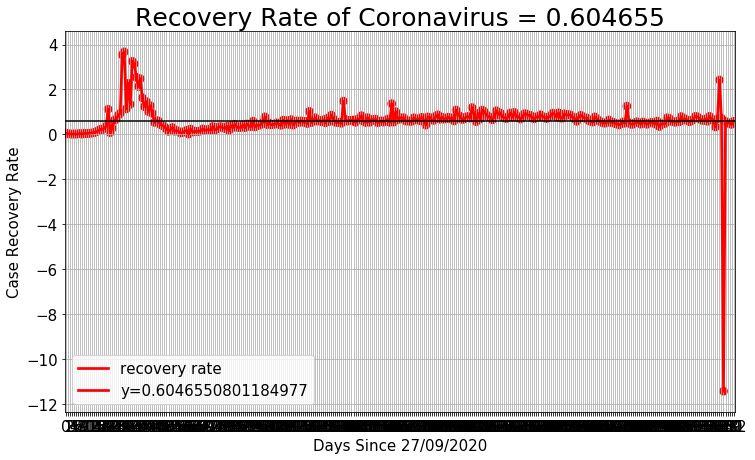

In [37]:
plt.figure(figsize=(12, 7))

sns.pointplot(days[:,0], recovery_rate, color='red')
plt.axhline(y = np.mean(recovery_rate),linestyle='-', color='black')
plt.title('Recovery Rate of Coronavirus = {0:2f}'.format(np.mean(recovery_rate)), size=25)
plt.legend(['recovery rate', 'y='+str(np.mean(recovery_rate))], prop={'size': 15})
plt.xlabel('Days Since 27/09/2020', size=15)
plt.ylabel('Case Recovery Rate', size=15)
plt.xticks(size=15)
plt.yticks(size=15)
plt.grid()

In [38]:
con_wise_confirm_cases = {}
con_wise_recovered_cases = {}
con_wise_death_cases = {}

for c in worst_countries.index:
    con_wise_confirm_cases[c] = confirmed_df[confirmed_df['Country/Region']==c].loc[:,dates].sum(axis = 0).values
    con_wise_death_cases[c] = deaths_df[deaths_df['Country/Region']==c].loc[:,dates].sum(axis = 0).values
    con_wise_recovered_cases[c] = recoveries_df[recoveries_df['Country/Region']==c].loc[:,dates].sum(axis = 0).values
    
# Let's look at confirmed cases in India
con_wise_confirm_cases['India']

array([       0,        0,        0,        0,        0,        0,
              0,        0,        1,        1,        1,        2,
              3,        3,        3,        3,        3,        3,
              3,        3,        3,        3,        3,        3,
              3,        3,        3,        3,        3,        3,
              3,        3,        3,        3,        3,        3,
              3,        3,        3,        3,        5,        5,
             28,       30,       31,       34,       39,       43,
             56,       62,       73,       82,      102,      113,
            119,      142,      156,      194,      244,      330,
            396,      499,      536,      657,      727,      887,
            987,     1024,     1251,     1397,     1998,     2543,
           2567,     3082,     3588,     4778,     5311,     5916,
           6725,     7598,     8446,     9205,    10453,    11487,
          12322,    13430,    14352,    15722,    17615,    18

In [39]:
# list of all the countries!!
con_wise_confirm_cases.keys()

dict_keys(['US', 'India', 'Brazil', 'Russia', 'Spain', 'Colombia', 'Peru', 'Mexico', 'Argentina', 'Italy', 'South Africa', 'Iran', 'Germany', 'Turkey', 'Chile', 'Bangladesh', 'Pakistan', 'Saudi Arabia', 'Iraq', 'Poland', 'Ukraine', 'Indonesia', 'Philippines', 'Belgium', 'Israel', 'Romania', 'Czechia', 'Morocco', 'Ecuador', 'Sweden', 'Qatar', 'Switzerland', 'Portugal', 'Kazakhstan', 'Bolivia', 'Panama', 'United Arab Emirates', 'Egypt', 'Dominican Republic', 'Kuwait', 'Belarus', 'Nepal', 'Austria', 'Oman', 'Japan', 'Guatemala', 'Honduras', 'Armenia', 'Costa Rica', 'Serbia'])

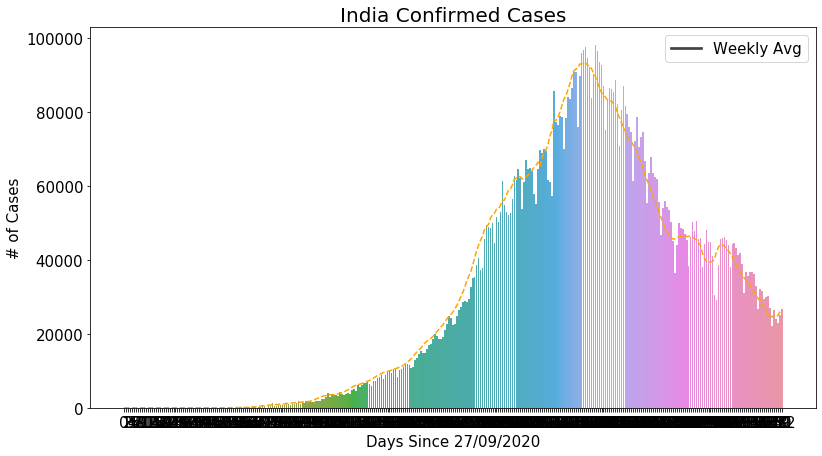

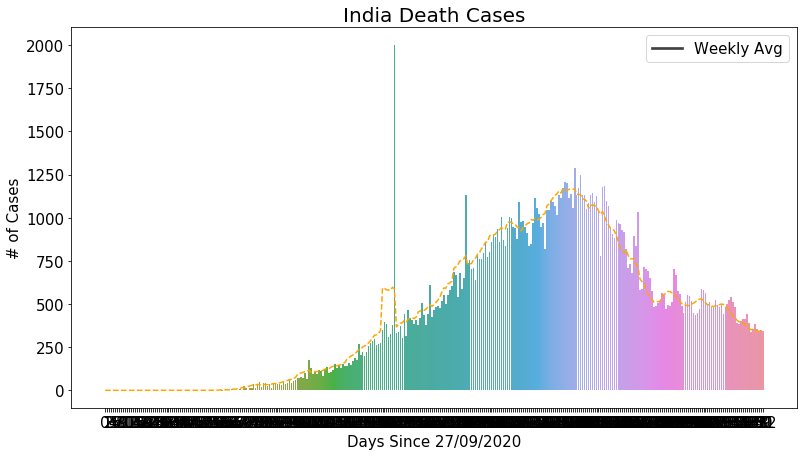

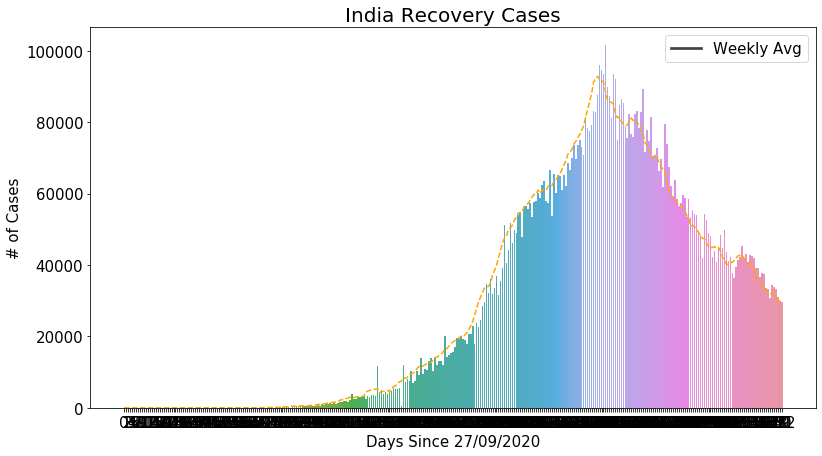

In [40]:
india_daily = daily_values(con_wise_confirm_cases['India'])
india_avg = weekly_average(india_daily)

india_daith_daily = daily_values(con_wise_death_cases['India'])
india_death_avg = weekly_average(india_daith_daily)

india_recovery_daily = daily_values(con_wise_recovered_cases['India'])
india_recovert_avg = weekly_average(india_recovery_daily)

plt.figure(figsize=(13, 7))
sns.barplot(days[:,0], india_daily)
plt.title('India Confirmed Cases', size=20)
plt.plot(days, india_avg, color='orange', linestyle='dashed')
plt.legend(['Weekly Avg'], prop={'size': 15})
plt.xlabel('Days Since 27/09/2020', size=15)
plt.ylabel('# of Cases', size=15)
plt.xticks(size=15)
plt.yticks(size=15)
plt.show()

plt.figure(figsize=(13, 7))
sns.barplot(days[:,0], india_daith_daily)
plt.title('India Death Cases', size=20)
plt.plot(days, india_death_avg, color='orange', linestyle='dashed')
plt.legend(['Weekly Avg'], prop={'size': 15})
plt.xlabel('Days Since 27/09/2020', size=15)
plt.ylabel('# of Cases', size=15)
plt.xticks(size=15)
plt.yticks(size=15)
plt.show()

plt.figure(figsize=(13, 7))
sns.barplot(days[:,0], india_recovery_daily)
plt.title('India Recovery Cases', size=20)
plt.plot(days, india_recovert_avg, color='orange', linestyle='dashed')
plt.legend(['Weekly Avg'], prop={'size': 15})
plt.xlabel('Days Since 27/09/2020', size=15)
plt.ylabel('# of Cases', size=15)
plt.xticks(size=15)
plt.yticks(size=15)
plt.show()

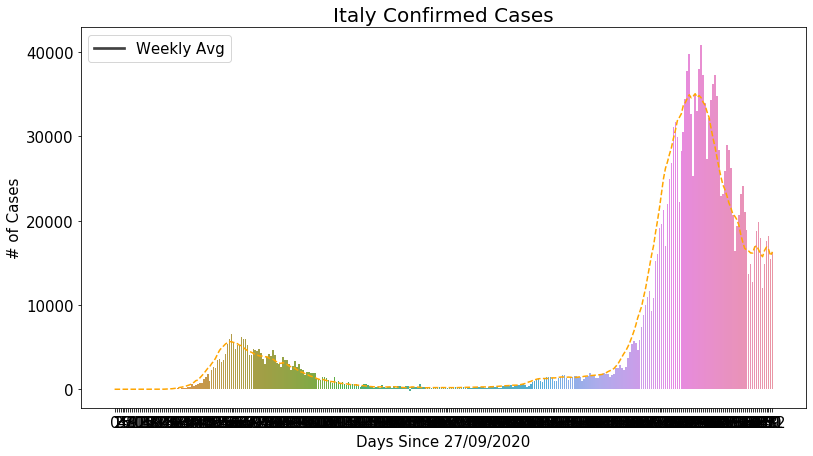

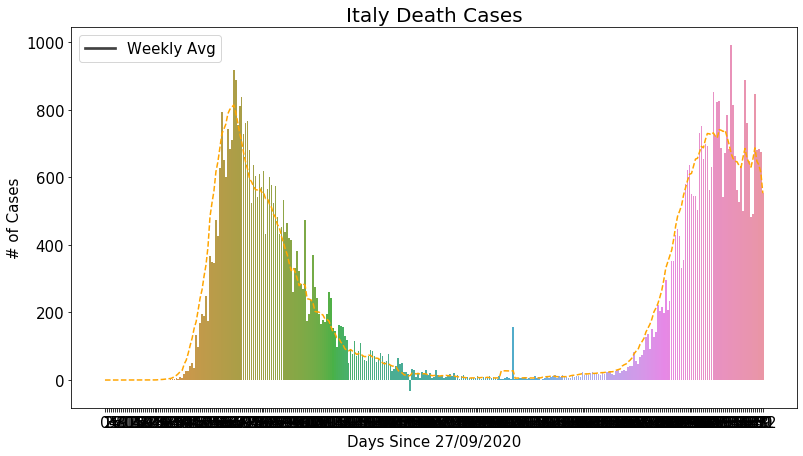

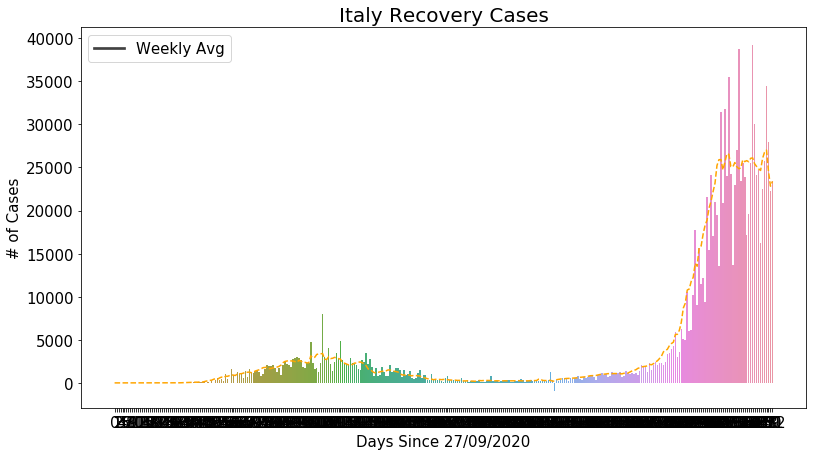

In [41]:
con_daily = daily_values(con_wise_confirm_cases['Italy'])
con_avg = weekly_average(con_daily)

con_daith_daily = daily_values(con_wise_death_cases['Italy'])
con_death_avg = weekly_average(con_daith_daily)

con_recovery_daily = daily_values(con_wise_recovered_cases['Italy'])
con_recovert_avg = weekly_average(con_recovery_daily)

plt.figure(figsize=(13, 7))
sns.barplot(days[:,0], con_daily)
plt.title('Italy Confirmed Cases', size=20)
plt.plot(days, con_avg, color='orange', linestyle='dashed')
plt.legend(['Weekly Avg'], prop={'size': 15})
plt.xlabel('Days Since 27/09/2020', size=15)
plt.ylabel('# of Cases', size=15)
plt.xticks(size=15)
plt.yticks(size=15)
plt.show()

plt.figure(figsize=(13, 7))
sns.barplot(days[:,0], con_daith_daily)
plt.title('Italy Death Cases', size=20)
plt.plot(days, con_death_avg, color='orange', linestyle='dashed')
plt.legend(['Weekly Avg'], prop={'size': 15})
plt.xlabel('Days Since 27/09/2020', size=15)
plt.ylabel('# of Cases', size=15)
plt.xticks(size=15)
plt.yticks(size=15)
plt.show()

plt.figure(figsize=(13, 7))
sns.barplot(days[:,0], con_recovery_daily)
plt.title('Italy Recovery Cases', size=20)
plt.plot(days, con_recovert_avg, color='orange', linestyle='dashed')
plt.legend(['Weekly Avg'], prop={'size': 15})
plt.xlabel('Days Since 27/09/2020', size=15)
plt.ylabel('# of Cases', size=15)
plt.xticks(size=15)
plt.yticks(size=15)
plt.show()

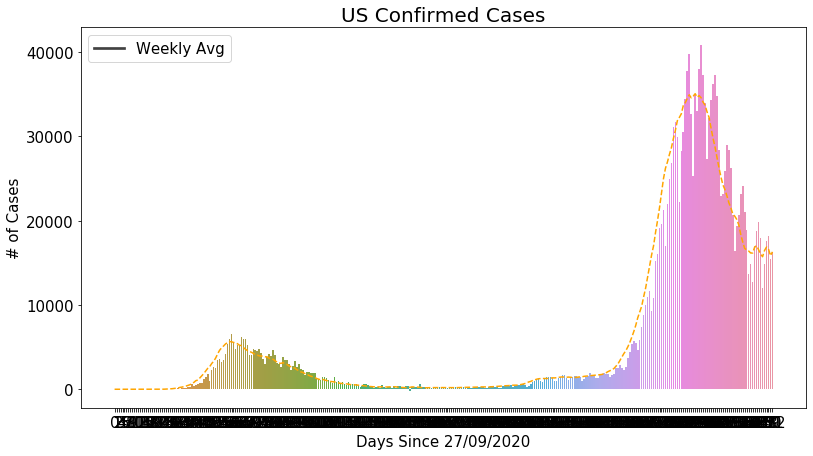

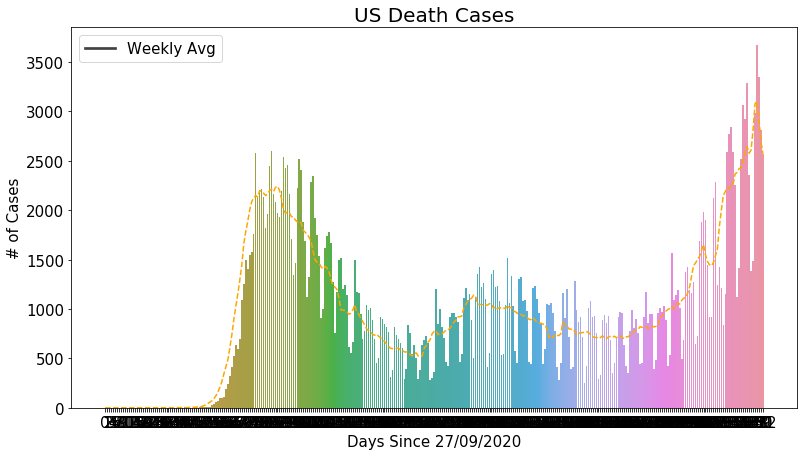

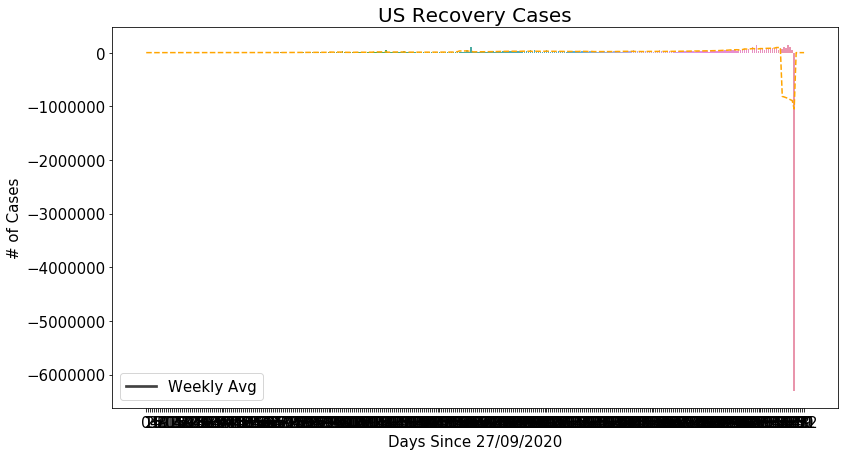

In [42]:
on_daily = daily_values(con_wise_confirm_cases['US'])
con_avg = weekly_average(con_daily)

con_daith_daily = daily_values(con_wise_death_cases['US'])
con_death_avg = weekly_average(con_daith_daily)

con_recovery_daily = daily_values(con_wise_recovered_cases['US'])
con_recovert_avg = weekly_average(con_recovery_daily)

plt.figure(figsize=(13, 7))
sns.barplot(days[:,0], con_daily)
plt.title('US Confirmed Cases', size=20)
plt.plot(days, con_avg, color='orange', linestyle='dashed')
plt.legend(['Weekly Avg'], prop={'size': 15})
plt.xlabel('Days Since 27/09/2020', size=15)
plt.ylabel('# of Cases', size=15)
plt.xticks(size=15)
plt.yticks(size=15)
plt.show()

plt.figure(figsize=(13, 7))
sns.barplot(days[:,0], con_daith_daily)
plt.title('US Death Cases', size=20)
plt.plot(days, con_death_avg, color='orange', linestyle='dashed')
plt.legend(['Weekly Avg'], prop={'size': 15})
plt.xlabel('Days Since 27/09/2020', size=15)
plt.ylabel('# of Cases', size=15)
plt.xticks(size=15)
plt.yticks(size=15)
plt.show()

plt.figure(figsize=(13, 7))
sns.barplot(days[:,0], con_recovery_daily)
plt.title('US Recovery Cases', size=20)
plt.plot(days, con_recovert_avg, color='orange', linestyle='dashed')
plt.legend(['Weekly Avg'], prop={'size': 15})
plt.xlabel('Days Since 27/09/2020', size=15)
plt.ylabel('# of Cases', size=15)
plt.xticks(size=15)
plt.yticks(size=15)
plt.show()

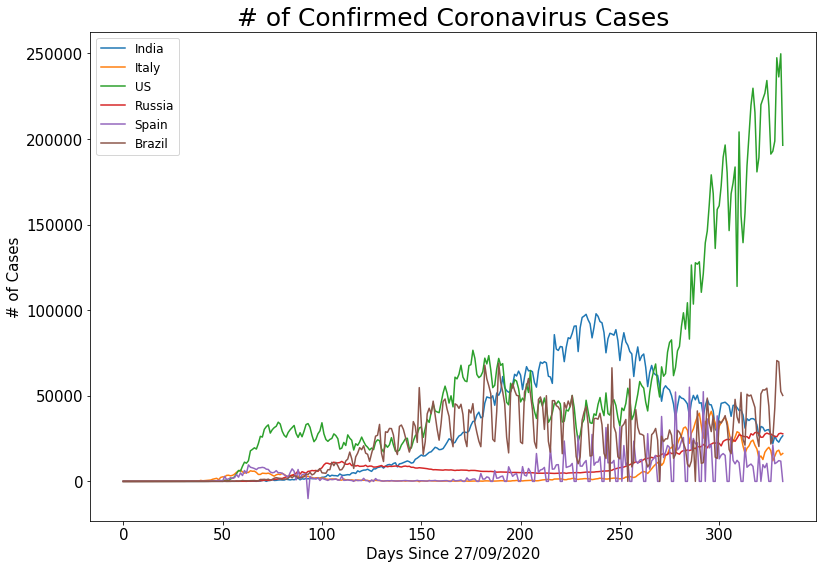

In [43]:
plt.figure(figsize=(13, 9))
sns.lineplot(days[:,0], daily_values(con_wise_confirm_cases['India']))
sns.lineplot(days[:,0], daily_values(con_wise_confirm_cases['Italy']))
sns.lineplot(days[:,0], daily_values(con_wise_confirm_cases['US']))
sns.lineplot(days[:,0], daily_values(con_wise_confirm_cases['Russia']))
sns.lineplot(days[:,0], daily_values(con_wise_confirm_cases['Spain']))
sns.lineplot(days[:,0], daily_values(con_wise_confirm_cases['Brazil']))

plt.title('# of Confirmed Coronavirus Cases', size=25)
plt.xlabel('Days Since 27/09/2020', size=15)
plt.ylabel('# of Cases', size=15)
plt.legend(['India', 'Italy', 'US', 'Russia', 'Spain','Brazil'], prop={'size': 12})
plt.xticks(size=15)
plt.yticks(size=15)
plt.show()

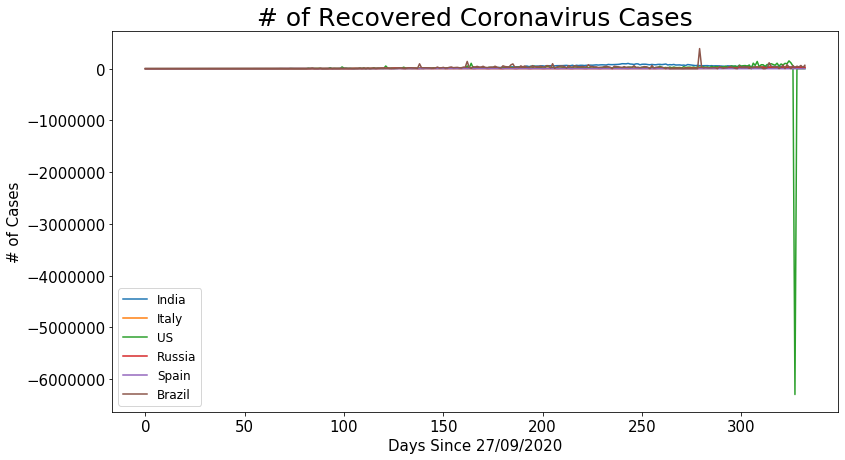

In [44]:
plt.figure(figsize=(13, 7))
sns.lineplot(days[:,0], daily_values(con_wise_recovered_cases['India']))
sns.lineplot(days[:,0], daily_values(con_wise_recovered_cases['Italy']))
sns.lineplot(days[:,0], daily_values(con_wise_recovered_cases['US']))
sns.lineplot(days[:,0], daily_values(con_wise_recovered_cases['Russia']))
sns.lineplot(days[:,0], daily_values(con_wise_recovered_cases['Spain']))
sns.lineplot(days[:,0], daily_values(con_wise_recovered_cases['Brazil']))

plt.title('# of Recovered Coronavirus Cases', size=25)
plt.xlabel('Days Since 27/09/2020', size=15)
plt.ylabel('# of Cases', size=15)
plt.legend(['India', 'Italy', 'US', 'Russia', 'Spain','Brazil'], prop={'size': 12})
plt.xticks(size=15)
plt.yticks(size=15)
plt.show()

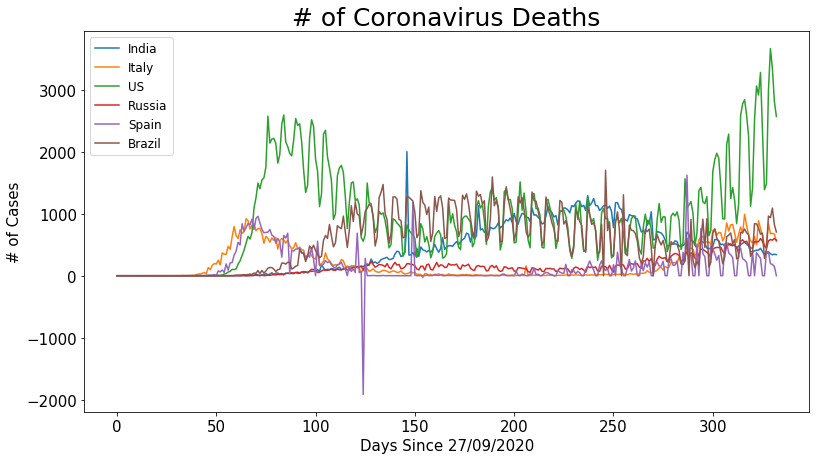

In [45]:
plt.figure(figsize=(13, 7))
sns.lineplot(days[:,0], daily_values(con_wise_death_cases['India']))
sns.lineplot(days[:,0], daily_values(con_wise_death_cases['Italy']))
sns.lineplot(days[:,0], daily_values(con_wise_death_cases['US']))
sns.lineplot(days[:,0], daily_values(con_wise_death_cases['Russia']))
sns.lineplot(days[:,0], daily_values(con_wise_death_cases['Spain']))
sns.lineplot(days[:,0], daily_values(con_wise_death_cases['Brazil']))

plt.title('# of Coronavirus Deaths', size=25)
plt.xlabel('Days Since 27/09/2020', size=15)
plt.ylabel('# of Cases', size=15)
plt.legend(['India', 'Italy', 'US', 'Russia', 'Spain','Brazil'], prop={'size': 12})
plt.xticks(size=15)
plt.yticks(size=15)
plt.show()

In [46]:
latest_data_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports_us/12-18-2020.csv')
latest_data_df.head()

,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,FIPS,Incident_Rate,Total_Test_Results,People_Hospitalized,Case_Fatality_Ratio,UID,ISO3,Testing_Rate,Hospitalization_Rate
0,Alabama,US,2020-12-19 05:30:27,32.3182,-86.9023,315683,4296,183625.0,127762.0,1.0,6438.325293,1764750.0,NaN,1.360859,84000001.0,USA,35991.911380,NaN
1,Alaska,US,2020-12-19 05:30:27,61.3707,-152.4044,43352,183,7165.0,36004.0,2.0,5926.087937,1184922.0,NaN,0.422126,84000002.0,USA,161975.271514,NaN
2,American Samoa,US,2020-12-19 05:30:27,-14.2710,-170.1320,0,0,NaN,0.0,60.0,0.000000,2140.0,NaN,NaN,16.0,ASM,3846.084722,NaN
3,Arizona,US,2020-12-19 05:30:27,33.7298,-111.4312,442671,7819,65350.0,369502.0,4.0,6081.717424,2605792.0,NaN,1.766323,84000004.0,USA,35800.155439,NaN
4,Arkansas,US,2020-12-19 05:30:27,34.9697,-92.3731,197421,3139,171864.0,22418.0,5.0,6541.876146,1913448.0,NaN,1.590003,84000005.0,USA,63405.310617,NaN


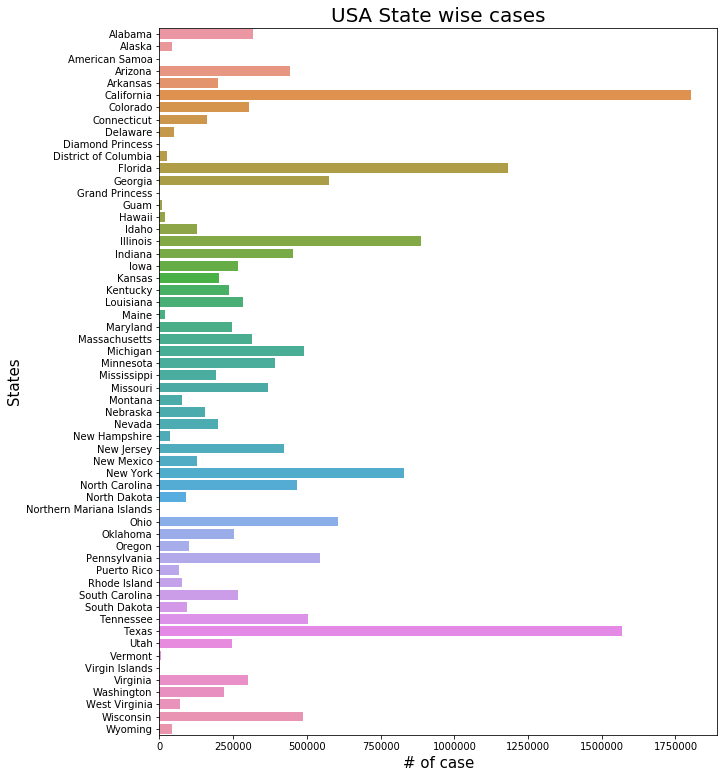

In [47]:
plt.figure(figsize=(10,13))
sns.barplot(x = latest_data_df['Confirmed'],y=latest_data_df['Province_State'])
plt.title('USA State wise cases', size=20)
plt.xlabel('# of case', size=15)
plt.ylabel('States', size=15)
plt.show()

##### Worst hit state in US is California, followed by Texas, Florida, and New York

In [48]:
x = latest_data_df['Confirmed'].sort_values(ascending=False)[:10]
y = []
for i in x.index:
    y.append(latest_data_df['Province_State'][i])
    
x = list(x)
temp = sum(latest_data_df['Confirmed'].sort_values(ascending=False)[10:])
x.append(temp)
y.append('Others')

Text(0.5, 1.0, '% of cases based on US states')

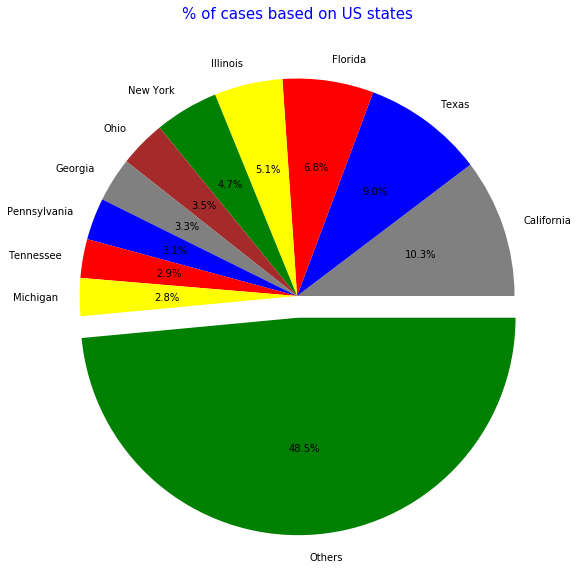

In [49]:
colors = ['grey','blue','red','yellow','green','brown']
explode = [0,0,0,0,0,0,0,0,0,0,0.1]

# visual
plt.figure(figsize = (10,10))
plt.pie(x, labels=y, explode = explode,colors=colors, autopct='%1.1f%%')
plt.title('% of cases based on US states',color = 'blue',fontsize = 15)